In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import  cv2


import shutil
from PIL import Image

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


In [3]:
os.listdir(path)

['PetImages', 'readme[1].txt', 'MSR-LA - 3467.docx']

In [4]:
path='/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

In [5]:
os.listdir(path)

['Dog', 'Cat']

In [29]:


# Define the path for the dataset
path = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

# Define the target path for the working directory
target_path = '/kaggle/working/PetImages'

# Copy dataset and reshape images
for category in ['Cat', 'Dog']:
    source_folder = os.path.join(path, category)
    target_folder = os.path.join(target_path, category)

    # Create the target folder if it doesn't exist
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)
        target_file_path = os.path.join(target_folder, filename)

        try:
            # Open the image, convert to grayscale, resize and save to target folder
            with Image.open(file_path) as img:
                img = img.convert("RGB")
                img = img.resize((256, 256))  # Resize image to 256x256
                img.save(target_file_path)  # Save the reshaped image
        except:
            print(f"Error processing file: {filename}")
            continue

# After reshaping, now you can proceed with other tasks (e.g., training)
print("Images reshaped and copied successfully.")

Error processing file: Thumbs.db
Error processing file: 666.jpg


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error processing file: 11702.jpg
Error processing file: Thumbs.db
Images reshaped and copied successfully.


In [30]:
class_names = os.listdir(path)
class_names

['Dog', 'Cat']

In [31]:
!pip install tensorflow


(128, 128, 1)


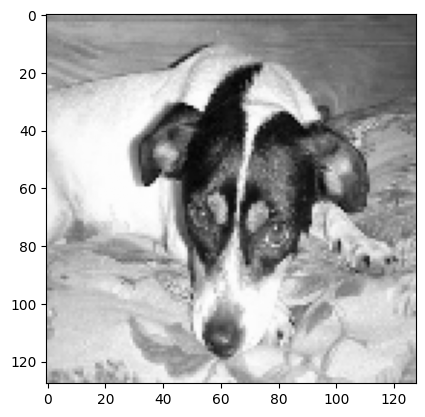

(128, 128, 1)


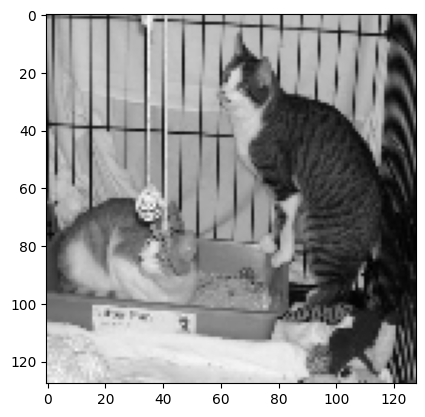

In [32]:
for sample in class_names:
  for img in os.listdir(os.path.join(path,sample)):
    img=cv2.imread(os.path.join(path,sample,img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(128,128))
    img=img.reshape(128,128,1)
    # print(os.path.join(path,sample,img))
    # print(img)
    img = img.astype('float32') / 255.0
    print(img.shape)
    plt.imshow(img,cmap='gray')
    plt.show()
    break

# Img Preprocess

## make all imgs (256,256,1) as gray scale

In [33]:
from tensorflow.keras.utils import image_dataset_from_directory

img_size=(128,128)
batch_size=128

train_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    # color_mode='grayscale',
    label_mode='binary'  # Binary labels (for binary classification: cat vs dog)
)

val_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    # color_mode='grayscale',
    label_mode='binary'
)



Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


# Model Training

In [34]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             

 Total params: 2,721,217 (10.38 MB)

 Trainable params: 2,718,721 (10.37 MB)

 Non-trainable params: 2,496 (9.75 KB)

## Define the EarlyStopping callback


In [35]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [36]:
# Check the shape of images in the training dataset
for images, labels in train_st.take(1):  # Only take one batch to check
    print(f"Training Images Shape: {images.shape}")
    print(f"Training Labels Shape: {labels.shape}")

# Check the shape of images in the validation dataset
for images, labels in val_st.take(1):  # Only take one batch to check
    print(f"Validation Images Shape: {images.shape}")
    print(f"Validation Labels Shape: {labels.shape}")


Training Images Shape: (128, 128, 128, 3)
Training Labels Shape: (128, 1)
Validation Images Shape: (128, 128, 128, 3)
Validation Labels Shape: (128, 1)


## Train the model


In [37]:
history = model.fit(
    train_st,
    validation_data=val_st,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.5654 - loss: 0.9075 - val_accuracy: 0.6849 - val_loss: 0.5972
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.6954 - loss: 0.5798 - val_accuracy: 0.7373 - val_loss: 0.5311
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.7836 - loss: 0.4689 - val_accuracy: 0.6319 - val_loss: 0.5840
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.8420 - loss: 0.3655 - val_accuracy: 0.8460 - val_loss: 0.3793
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.8876 - loss: 0.2754 - val_accuracy: 0.7453 - val_loss: 0.4600
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.9122 - loss: 0.2189 - val_accuracy: 0.7974 - val_loss: 0.4342
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9280 - loss: 0.1782 - val_accuracy: 0.8526 - val_loss: 0.3327
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9347 - loss: 0

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9337 - loss: 0.2302
Validation Loss: 0.23142406344413757
Validation Accuracy: 0.9329866170883179


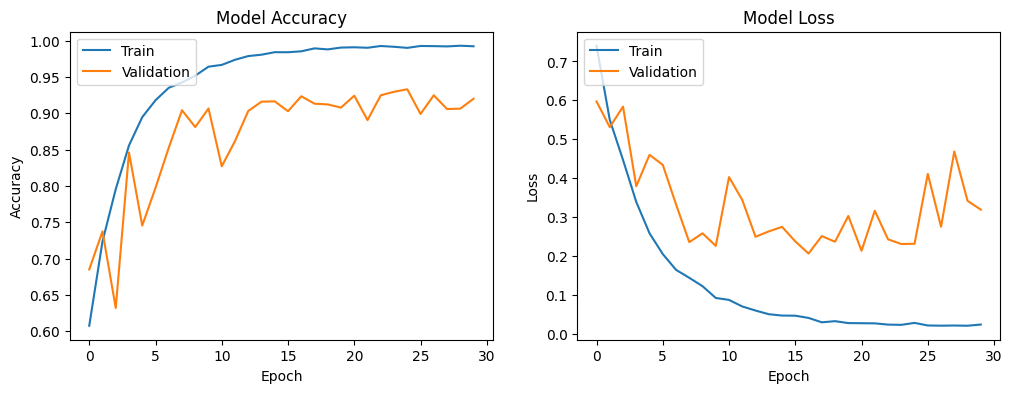

In [38]:
# prompt: make a model evaluation

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_st)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# You can also plot the training history to visualize performance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [39]:
model.save('model_v0.h5')

In [40]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             

 Total params: 2,721,217 (10.38 MB)

 Trainable params: 2,718,721 (10.37 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [41]:
history = model.fit(
    train_st,
    validation_data=val_st,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 160ms/step - accuracy: 0.5336 - loss: 1.0696 - val_accuracy: 0.5415 - val_loss: 0.7858
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.6294 - loss: 0.6523 - val_accuracy: 0.5791 - val_loss: 0.7837
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.6957 - loss: 0.5862 - val_accuracy: 0.7357 - val_loss: 0.5314
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.7535 - loss: 0.5064 - val_accuracy: 0.7932 - val_loss: 0.4512
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.7925 - loss: 0.4467 - val_accuracy: 0.7431 - val_loss: 0.5160
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.8411 - loss: 0.3751 - val_accuracy: 0.8212 - val_loss: 0.3984
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.8671 - loss: 0.3201 - val_accuracy: 0.8766 - val_loss: 0.3148
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.8903 - loss: 0

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9101 - loss: 0.2149
Validation Loss: 0.20534011721611023
Validation Accuracy: 0.9163832664489746


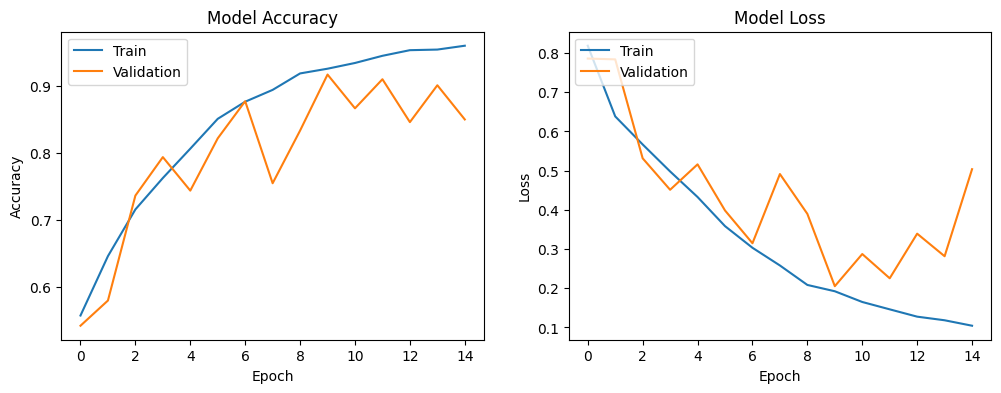

In [42]:
# prompt: make a model evaluation

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_st)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# You can also plot the training history to visualize performance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [43]:
model.save('model_v1.h5')

In [44]:

img_size=(128,128)
batch_size=64

train_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size,
    # color_mode='grayscale',
    label_mode='binary'  # Binary labels (for binary classification: cat vs dog)
)

val_st = image_dataset_from_directory(
    target_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    # color_mode='grayscale',
    label_mode='binary'
)


Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [45]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             

 Total params: 2,721,217 (10.38 MB)

 Trainable params: 2,718,721 (10.37 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [46]:
history = model.fit(
    train_st,
    validation_data=val_st,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.5651 - loss: 0.8857 - val_accuracy: 0.6209 - val_loss: 0.7573
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.6802 - loss: 0.6009 - val_accuracy: 0.7728 - val_loss: 0.4826
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7821 - loss: 0.4696 - val_accuracy: 0.6661 - val_loss: 0.5698
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8447 - loss: 0.3636 - val_accuracy: 0.8618 - val_loss: 0.3380
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.8933 - loss: 0.2572 - val_accuracy: 0.7550 - val_loss: 0.4527
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9155 - loss: 0.2079 - val_accuracy: 0.8608 - val_loss: 0.3305
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9252 - loss: 0.1866 - val_accuracy: 0.8304 - val_loss: 0.3927
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.9430 - loss: 0.1484 - 

In [47]:
model.save('model_v2.h5')


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9341 - loss: 0.1738
Validation Loss: 0.1753765046596527
Validation Accuracy: 0.9313862919807434


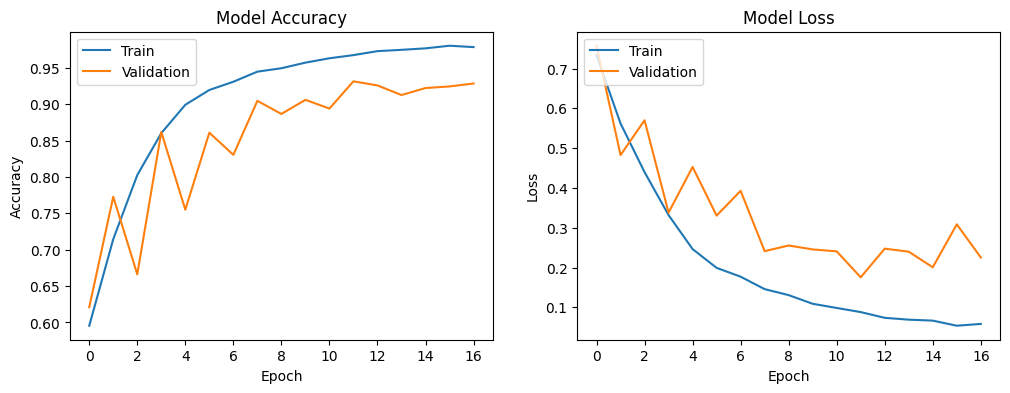

In [48]:
# prompt: make a model evaluation

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_st)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# You can also plot the training history to visualize performance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [49]:
# import streamlit as st
# import numpy as np
# from PIL import Image
# import io
# import os
# import tensorflow as tf

# # Set page configuration
# st.set_page_config(page_title="Cat vs Dog Classifier", page_icon="🐱🐶")

# @st.cache_resource
# def load_model():
#     """Load the pre-trained model"""
#     try:
#         # Set memory growth to avoid memory allocation issues
#         gpus = tf.config.experimental.list_physical_devices('GPU')
#         if gpus:
#             for gpu in gpus:
#                 tf.config.experimental.set_memory_growth(gpu, True)

#         # Check if model file exists
#         if os.path.exists('model_v2.h5'):
#             model = tf.keras.models.load_model('model_v2.h5')
#             return model
#         else:
#             st.error("Model file 'model_v2.h5' not found.")
#             return None
#     except Exception as e:
#         st.error(f"Error loading model: {e}")
#         return None

# def preprocess_image(image):
#     """Preprocess the image for model prediction"""
#     # Convert to grayscale
#     img = image.convert('L')
#     # Resize to 128x128
#     img = img.resize((128, 128))
#     # Convert to numpy array
#     img_array = np.array(img)
#     # Normalize pixel values
#     img_array = img_array.astype('float32') / 255.0
#     # Reshape for model input
#     img_array = np.reshape(img_array, (1, 128, 128, 1))
#     return img_array

# # Main app
# st.title("Cat vs Dog Classifier 🐱🐶")
# st.write("Upload an image of a cat or dog, and the model will predict which one it is.")

# # Load model
# model = load_model()

# # Image upload
# uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# if uploaded_file is not None:
#     # Display the uploaded image
#     image = Image.open(uploaded_file)
#     col1, col2 = st.columns(2)

#     with col1:
#         st.image(image, caption="Uploaded Image", use_column_width=True)

#     # Preprocess the image and make prediction
#     processed_image = preprocess_image(image)

#     with col2:
#         st.write("Processing...")
#         if model is not None:
#             try:
#                 prediction = model.predict(processed_image)
#                 confidence = float(prediction[0][0])

#                 # Display results
#                 if confidence > 0.5:
#                     result = f"Dog (Confidence: {confidence:.2%})"
#                     st.success(result)
#                 else:
#                     result = f"Cat (Confidence: {(1-confidence):.2%})"
#                     st.success(result)

#                 # Show prediction gauge
#                 st.write("Prediction Confidence:")
#                 st.progress(confidence if confidence > 0.5 else 1-confidence)
#             except Exception as e:
#                 st.error(f"Error during prediction: {str(e)}")
#         else:
#             st.error("Model could not be loaded. Please check the logs for details.")

# # Add instructions on how to run the app
# st.sidebar.title("About")
# st.sidebar.info(
#     """
#     This app uses a CNN model trained on the Microsoft Cats vs Dogs dataset.

#     The model was trained to distinguish between images of cats and dogs with grayscale images.

#     Upload a picture to see if the model correctly identifies it!
#     """
# )

# # How to run instructions
# st.sidebar.title("How to Run")
# st.sidebar.code("streamlit run app.py")

# # Add troubleshooting info
# st.sidebar.title("Troubleshooting")
# st.sidebar.info(
#     """
#     If you encounter issues with the model loading:

#     1. Make sure the model file (model_v2.h5) is in the same directory as the app.py file
#     2. Check that TensorFlow is properly installed
#     3. Try refreshing the page
#     """
# )


In [50]:
# prompt: I want to know the libs version to deploy the model at streamlit cloud

!pip show numpy matplotlib pandas scikit-learn tensorflow opencv-python Pillow kagglehub streamlit


Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRI